In [32]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv('/content/Ecommerce Customers')

In [35]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [36]:
df.shape

(500, 8)

In [37]:
df.drop(['Address','Email','Avatar'],axis=1,inplace=True)

In [61]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [40]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**visualization**

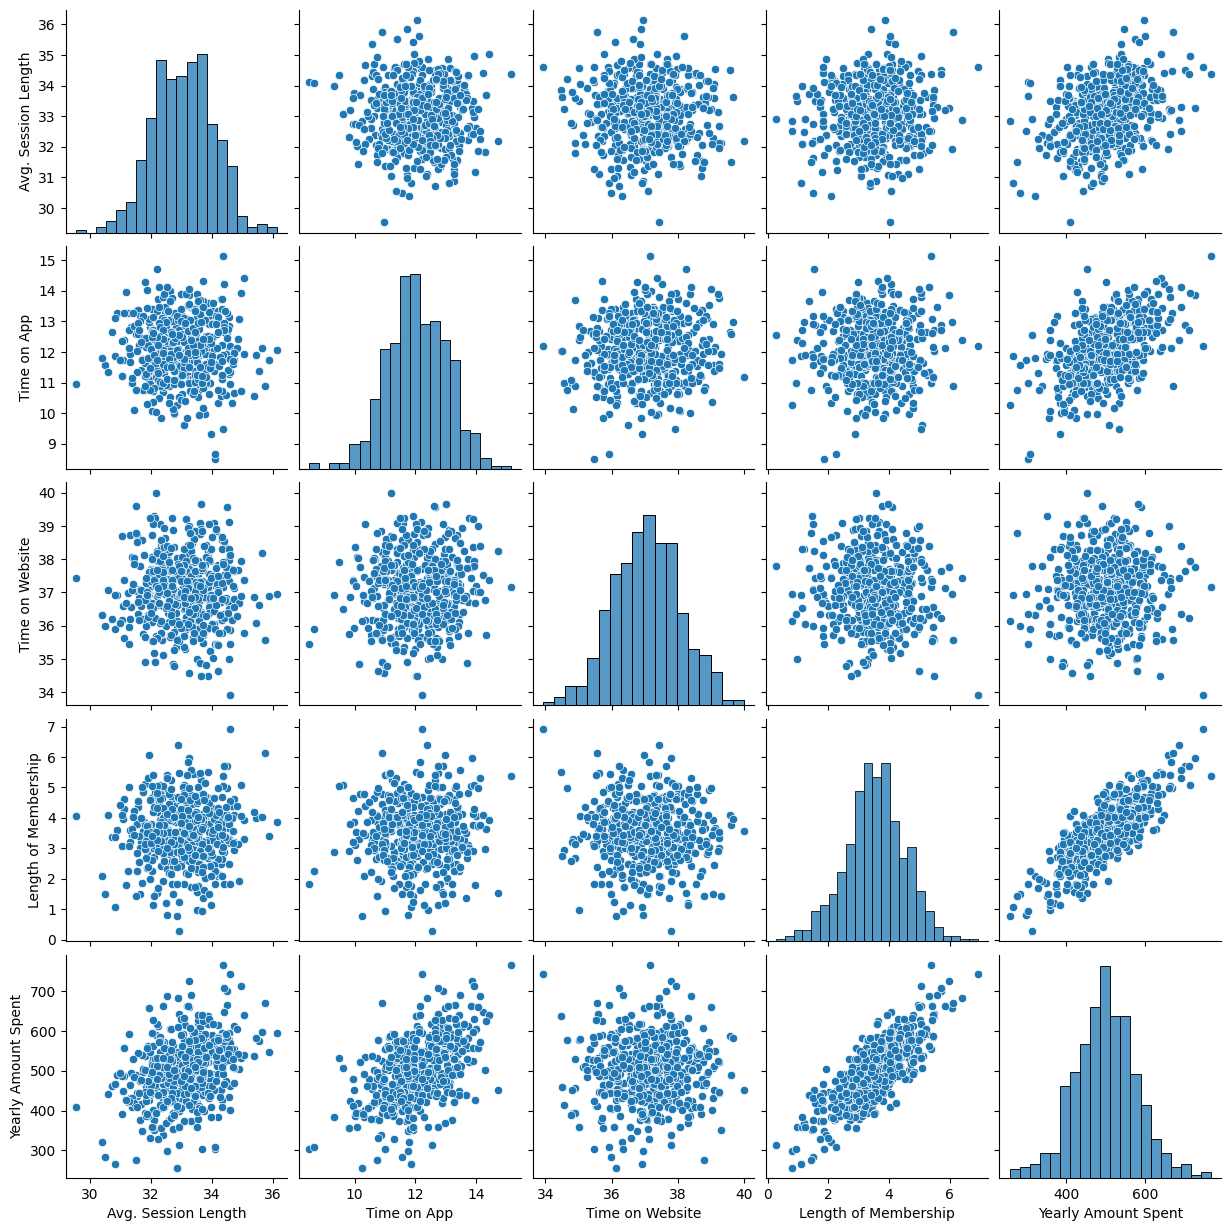

In [41]:
sns.pairplot(df)

<Axes: xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>

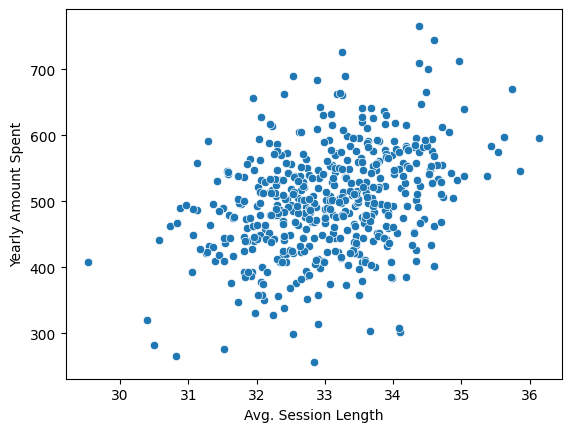

In [42]:
sns.scatterplot(data=df,x='Avg. Session Length',y='Yearly Amount Spent')

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

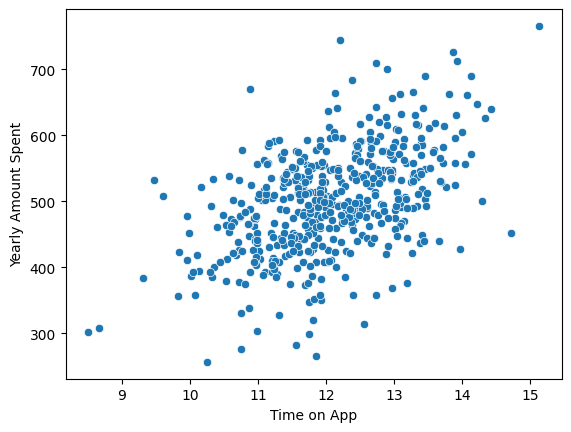

In [43]:
sns.scatterplot(data=df,x='Time on App',y='Yearly Amount Spent')

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

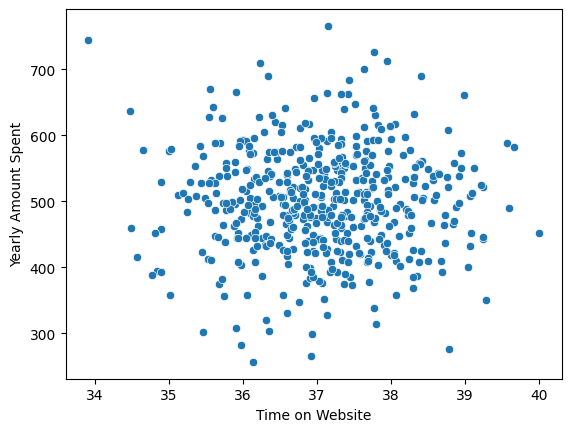

In [44]:
sns.scatterplot(data=df,x='Time on Website',y='Yearly Amount Spent')

<Axes: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

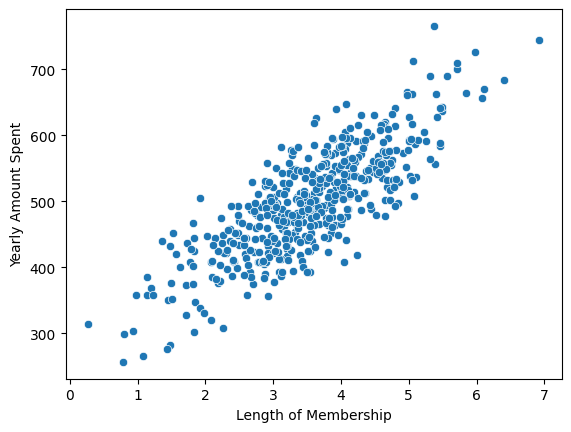

In [45]:
sns.scatterplot(data=df,x='Length of Membership',y='Yearly Amount Spent')

<Axes: >

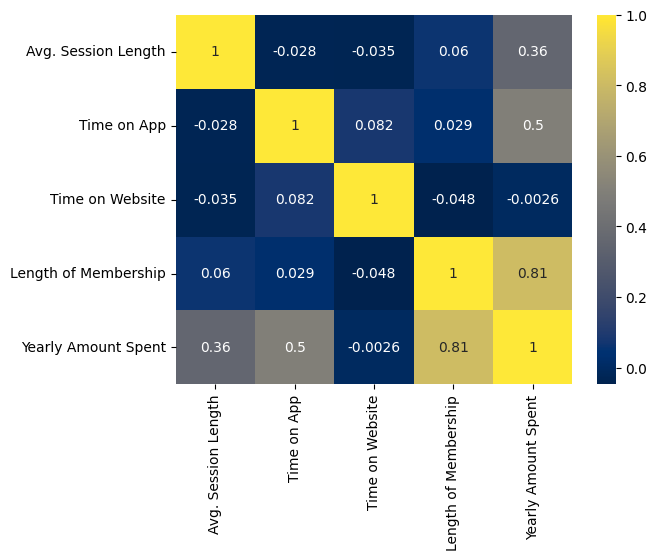

In [46]:
sns.heatmap(df.corr(),annot=True,cmap='cividis')

In [47]:
# extracting indipendent and dependent variable
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [48]:
x.head,y.head()

(<bound method NDFrame.head of      Avg. Session Length  Time on App  Time on Website  Length of Membership
 0              34.497268    12.655651        39.577668              4.082621
 1              31.926272    11.109461        37.268959              2.664034
 2              33.000915    11.330278        37.110597              4.104543
 3              34.305557    13.717514        36.721283              3.120179
 4              33.330673    12.795189        37.536653              4.446308
 ..                   ...          ...              ...                   ...
 495            33.237660    13.566160        36.417985              3.746573
 496            34.702529    11.695736        37.190268              3.576526
 497            32.646777    11.499409        38.332576              4.958264
 498            33.322501    12.391423        36.840086              2.336485
 499            33.715981    12.418808        35.771016              2.735160
 
 [500 rows x 4 columns]>,
 0    

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [51]:
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred=lr.predict(x_test)

In [53]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.9837380400055443, 0.9861924261981548)

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9861924261981548

In [55]:
lr.coef_

array([25.88815047, 38.87046474,  0.47066154, 61.78369022])

In [56]:
sample_df=x.columns

In [57]:
df_coef=pd.DataFrame(lr.coef_,index=sample_df,columns=['Coefficient'])

In [58]:
df_coef

,Coefficient
Avg. Session Length,25.888150
Time on App,38.870465
Time on Website,0.470662
Length of Membership,61.783690


In [59]:
#for intercept
lr.intercept_

-1060.5508096198882